In [1]:
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#Extract Date Time

def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+),[ ]([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)?[ ]-'
    result = re.match(pattern, s)
    if result:
        return True
    else:
        return False
    
#Extract Contact

def find_contact(s):
    s = s.split(": ")
    if len(s) == 2:
        return True
    else:
        return False
    
#Extract Message

def get_message(line):
    splitline = line.split(" - ")
    datetime = splitline[0]
    date, time = datetime.split(", ")
    message = ' '.join(splitline[1:])
    
    if find_contact(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = splitmessage[1]
        
    else:
        author = None
        
    return date, time, author, message

In [3]:
data = []

conversation = 'WhatsApp Chat with Virtail PPC.txt'
with open(conversation, encoding = 'utf-8') as f:
    f.readline()
    message_buffer = []
    date, time, author = None, None, None
    
    while True:
        line = f.readline()
        if not line:
            break
        line = line.strip()
        
        if date_time(line):
            if len(message_buffer) > 0:
                data.append([date, time, author, ''.join(message_buffer)])
            message_buffer.clear()
            
            date, time, author, message = get_message(line)
            message_buffer.append(message)
            
            
        else:
            message_buffer.append(line)

In [4]:
df = pd.DataFrame(data, columns = ['date', 'time', 'contact', 'message'])
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.dtypes

date       datetime64[ns]
time               object
contact            object
message            object
dtype: object

In [6]:
df.head()

,date,time,contact,message
0,2019-12-25,10:37 AM,@IAmYogiz,Sure
1,2019-12-25,10:37 AM,Chirag Virtail,@919903012360 I had checked at 3 or 4 in morni...
2,2019-12-25,11:31 AM,Mayank Sir,Yes
3,2019-12-25,11:31 AM,Mayank Sir,I changed to 600 at 2 am
4,2019-12-25,11:31 AM,Mayank Sir,Aaj 600 karte hai


In [8]:
df.shape

(1226, 4)

In [9]:
df.isnull().sum()

date       0
time       0
contact    6
message    0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [13]:
df['positive'] = [sentiment.polarity_scores(i)['pos'] for i in df['message']]
df['negative'] = [sentiment.polarity_scores(i)['neg'] for i in df['message']]
df['neutral'] = [sentiment.polarity_scores(i)['neu'] for i in df['message']]

In [17]:
df.head(20)

,date,time,contact,message,positive,negative,neutral
0,2019-12-25,10:37 AM,@IAmYogiz,Sure,1.000,0.0,0.000
1,2019-12-25,10:37 AM,Chirag Virtail,@919903012360 I had checked at 3 or 4 in morni...,0.000,0.0,1.000
2,2019-12-25,11:31 AM,Mayank Sir,Yes,1.000,0.0,0.000
3,2019-12-25,11:31 AM,Mayank Sir,I changed to 600 at 2 am,0.000,0.0,1.000
4,2019-12-25,11:31 AM,Mayank Sir,Aaj 600 karte hai,0.000,0.0,1.000
5,2019-12-25,11:31 AM,Mayank Sir,26th we can go to 850. 27th. 1050?,0.000,0.0,1.000
6,2019-12-25,11:38 AM,Chirag Virtail,👍,0.000,0.0,0.000
7,2019-12-25,11:38 AM,@IAmYogiz,Canada ko bhi thoda budget de do,0.000,0.0,1.000
8,2019-12-25,11:39 AM,Chirag Virtail,Not today,0.000,0.0,1.000
9,2019-12-25,11:39 AM,Chirag Virtail,"26th I will increase, dont worry",0.611,0.0,0.389


In [15]:
x = sum(df['positive'])
y = sum(df['negative'])
z = sum(df['neutral'])

def score(a,b,c):
    
    if (a>b) and (a>c):
        print("Overall POSITIVE sentiment")
        
    if (b>a) and (b>c):
        print("Overall NAGATIVE sentiment")
        
    else:
        print("Overall NEUTRAL sentiment")


In [16]:
score(x,y,z)

Overall NEUTRAL sentiment


In [18]:
text = ' '.join(review for review in df['message'])
print("There are Total {} words in Chat".format(len(text)))

There are Total 32612 words in Chat


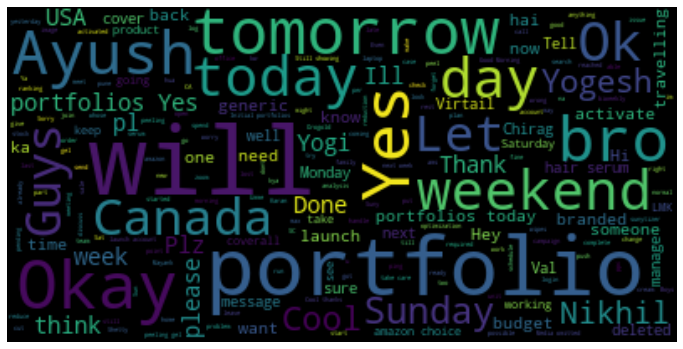

In [23]:
stopwords = set(STOPWORDS)
wc = WordCloud(stopwords = stopwords, background_color = 'black').generate(text)

plt.figure(figsize = (12,11))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()